In [85]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

In [86]:
class_names = ['Varder','Goblin','Joker','Thanos','Venom']

In [87]:
IMG_PATH = 'Villains'
img_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.1,
    fill_mode = 'nearest'
)

In [88]:
train_gen = img_datagen.flow_from_directory(IMG_PATH,
                                            target_size= (128,128),
                                            batch_size=32,
                                            shuffle=True,
                                            class_mode='categorical',
                                            subset='training')


validation_gen = img_datagen.flow_from_directory(IMG_PATH,
                                            target_size= (128,128),
                                            batch_size=32,
                                            shuffle=True,
                                            class_mode='categorical',
                                            subset='validation')

Found 90 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [89]:
image_generator = img_datagen.flow_from_directory(IMG_PATH,
                                            target_size= (128,128),
                                            batch_size=32,
                                            shuffle=True,
                                            class_mode='categorical',
                                            save_to_dir='Augmented',
                                            save_prefix= 'aug',
                                            save_format= 'jpg')

Found 100 images belonging to 5 classes.


In [90]:
file_names = image_generator.filenames
labels = image_generator.labels
labels_dict = image_generator.class_indices

In [91]:
labels_dict

{'Darth Vader': 0, 'Green Goblin': 1, 'Joker': 2, 'Thanos': 3, 'Venom': 4}

## Preview

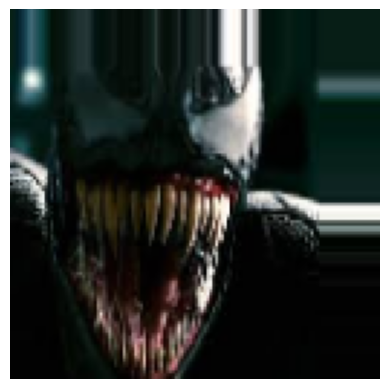

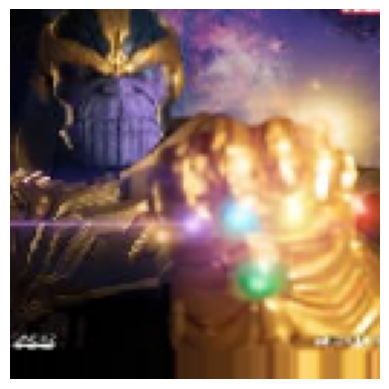

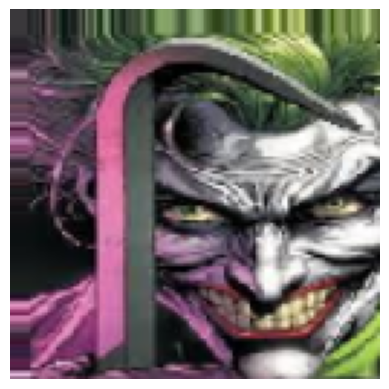

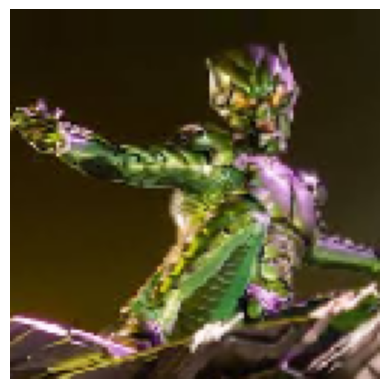

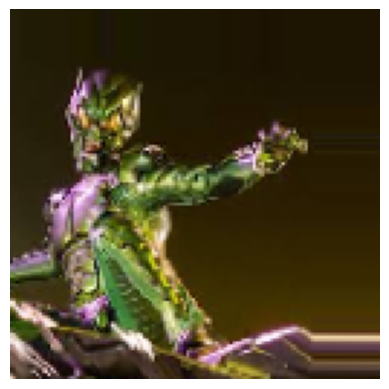

In [92]:
for _ in range(5):
    img, labels = image_generator.next()
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()

## Modeling

In [93]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [94]:
model = Sequential([
    Conv2D(256, (3,3), activation='relu', input_shape=[128,128,3]),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

In [95]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [96]:
hasil = model.fit(train_gen, validation_data = validation_gen, epochs=10, verbose=1)

Epoch 1/10
3/3 [==============================] - 5s 2s/step - loss: 1.7084 - accuracy: 0.1333 - val_loss: 1.6177 - val_accuracy: 0.2000
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 1.6204 - accuracy: 0.1667 - val_loss: 1.6063 - val_accuracy: 0.2000
Epoch 3/10
3/3 [==============================] - 5s 1s/step - loss: 1.6189 - accuracy: 0.2333 - val_loss: 1.6031 - val_accuracy: 0.2000
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 1.5960 - accuracy: 0.2222 - val_loss: 1.5865 - val_accuracy: 0.2000
Epoch 5/10
3/3 [==============================] - 5s 1s/step - loss: 1.5840 - accuracy: 0.2778 - val_loss: 1.5453 - val_accuracy: 0.2000
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 1.5269 - accuracy: 0.2444 - val_loss: 1.4742 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 1.4954 - accuracy: 0.3444 - val_loss: 1.4281 - val_accuracy: 0.3000
Epoch 8/10
3/3 [=========================

* mengubah batch_size menjadi 2 agar data yang di ambil lebih banyak untuk di test pada model

In [97]:
train_gen = img_datagen.flow_from_directory(IMG_PATH,
                                            target_size= (128,128),
                                            batch_size=2,
                                            shuffle=True,
                                            class_mode='categorical',
                                            subset='training')


validation_gen = img_datagen.flow_from_directory(IMG_PATH,
                                            target_size= (128,128),
                                            batch_size=2,
                                            shuffle=True,
                                            class_mode='categorical',
                                            subset='validation')

Found 90 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [98]:
hasil2 = model.fit(train_gen, validation_data = validation_gen, epochs=10, verbose=1)

Epoch 1/10
45/45 [==============================] - 5s 115ms/step - loss: 1.6086 - accuracy: 0.2444 - val_loss: 1.4988 - val_accuracy: 0.2000
Epoch 2/10
45/45 [==============================] - 5s 111ms/step - loss: 1.5233 - accuracy: 0.3444 - val_loss: 1.4928 - val_accuracy: 0.3000
Epoch 3/10
45/45 [==============================] - 5s 111ms/step - loss: 1.5009 - accuracy: 0.3556 - val_loss: 1.5134 - val_accuracy: 0.2000
Epoch 4/10
45/45 [==============================] - 5s 112ms/step - loss: 1.3910 - accuracy: 0.4000 - val_loss: 1.5875 - val_accuracy: 0.4000
Epoch 5/10
45/45 [==============================] - 5s 112ms/step - loss: 1.4551 - accuracy: 0.4000 - val_loss: 1.6072 - val_accuracy: 0.3000
Epoch 6/10
45/45 [==============================] - 5s 111ms/step - loss: 1.4827 - accuracy: 0.3444 - val_loss: 1.3209 - val_accuracy: 0.4000
Epoch 7/10
45/45 [==============================] - 5s 111ms/step - loss: 1.3168 - accuracy: 0.4222 - val_loss: 1.2880 - val_accuracy: 0.7000
Epoch 

## Evaluasi

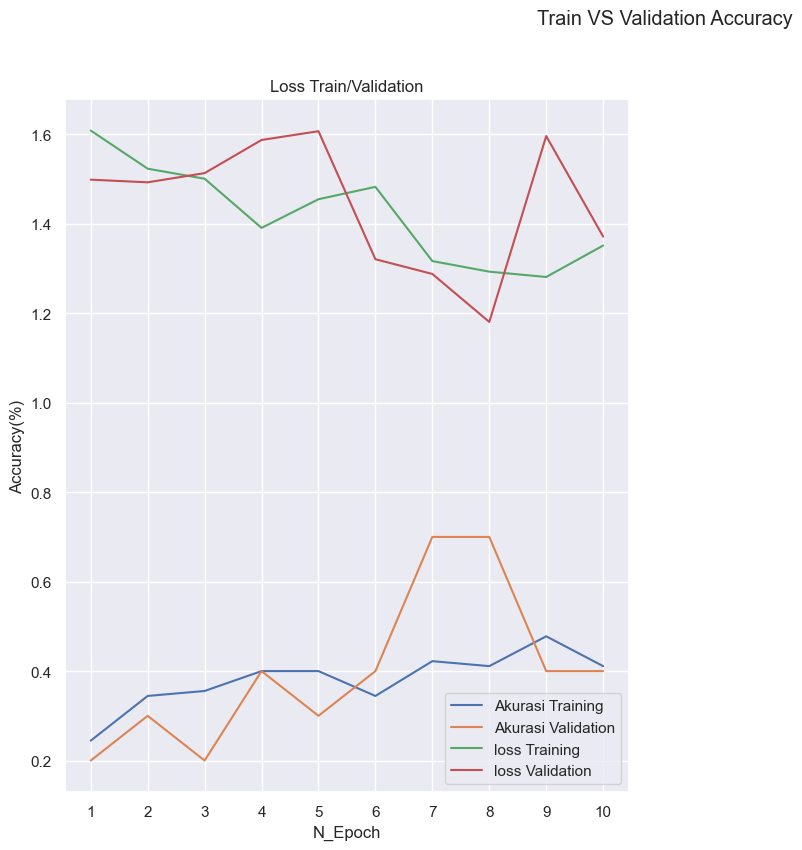

In [99]:
epoch = [i+1 for i in range(10)]

sns.set_theme()

plt.figure(figsize=(16,9))
plt.suptitle('Train VS Validation Accuracy')

#  Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x= epoch, y=hasil2.history['accuracy'], label='Akurasi Training')
sns.lineplot(x= epoch, y=hasil2.history['val_accuracy'], label='Akurasi Validation')

plt.xticks(epoch)
plt.xlabel('N_Epoch')
plt.ylabel('Accuracy(%)')
plt.title('Akurasi Train/Validation')


#  Subplot Loss
plt.subplot(1,2,1)
sns.lineplot(x= epoch, y=hasil2.history['loss'], label='loss Training')
sns.lineplot(x= epoch, y=hasil2.history['val_loss'], label='loss Validation')

plt.xticks(epoch)
plt.xlabel('N_Epoch')
plt.ylabel('Accuracy(%)')
plt.title('Loss Train/Validation')

plt.show()